In [15]:
from pandas import read_parquet
import seaborn as sns
from matplotlib import pyplot as plt

In [31]:
data = read_parquet("data/density_change/density_change.parquet")
data["Matrix name"] = data["matrix_name"].apply(lambda name: name.capitalize().replace("_", " "))
data["density_change_abs"] = data["nonzero_cells"].diff()
data.loc[data["step_in_time"] == 1, "density_change_abs"] = data.loc[data["step_in_time"] == 1, "density_change_abs"] = None
data["density_pct"] = 100 / data["total_cells"] * data["nonzero_cells"]
data

,matrix_name,step_in_time,total_cells,nonzero_cells,Matrix name,density_change_abs,density_pct
0,dairy_cow_acyclic,1,85896472561,810301,Dairy cow acyclic,NaN,0.000943
1,dairy_cow_acyclic,8,85896472561,3021209,Dairy cow acyclic,2210908.0,0.003517
2,dairy_cow_acyclic,16,85896472561,5601361,Dairy cow acyclic,2580152.0,0.006521
3,dairy_cow_acyclic,24,85896472561,8238473,Dairy cow acyclic,2637112.0,0.009591
4,dairy_cow_acyclic,32,85896472561,10929916,Dairy cow acyclic,2691443.0,0.012725
...,...,...,...,...,...,...,...
61,dairy_cow_cyclic,224,85896472561,142721778,Dairy cow cyclic,5402508.0,0.166156
62,dairy_cow_cyclic,232,85896472561,148124222,Dairy cow cyclic,5402444.0,0.172445
63,dairy_cow_cyclic,240,85896472561,153526602,Dairy cow cyclic,5402380.0,0.178734
64,dairy_cow_cyclic,248,85896472561,158928918,Dairy cow cyclic,5402316.0,0.185024


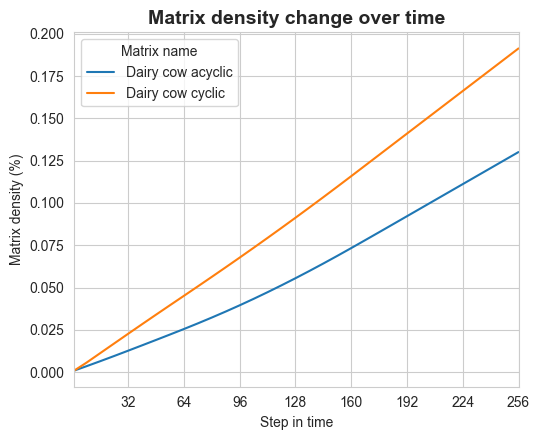

In [34]:
f, ax = plt.subplots(figsize=(5.5, 4.5))
sns.lineplot(data, x="step_in_time", y="density_pct", hue="Matrix name", ax=ax)
ax.set_title("Matrix density change over time", fontdict={"fontsize": 14, "fontweight": "bold"})
ax.set_xlabel("Step in time")
ax.set_xticks(range(0, data["step_in_time"].max() + 1, 32))
ax.set_xlim([1, 256])
ax.set_ylabel("Matrix density (%)")
plt.tight_layout()
plt.savefig("density_change.svg")
plt.show()